In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.style.use("seaborn")

In [2]:
def plot(times, temp, temp_target, extrude, step, filename):

    plt.plot(temp, label="Nozzle Temperature")
    plt.plot(temp_target, label="Target Temperature")
    plt.plot(extrude, label="Extrustion Start")

    plt.xlim(step - 50, step + 200)
    plt.ylim(198, 203)

    plt.xlabel("Temperature / C")
    plt.xlabel("Time / s")

    plt.legend()

    plt.savefig("figures/" + filename + ".png", dpi=200)
    plt.show()


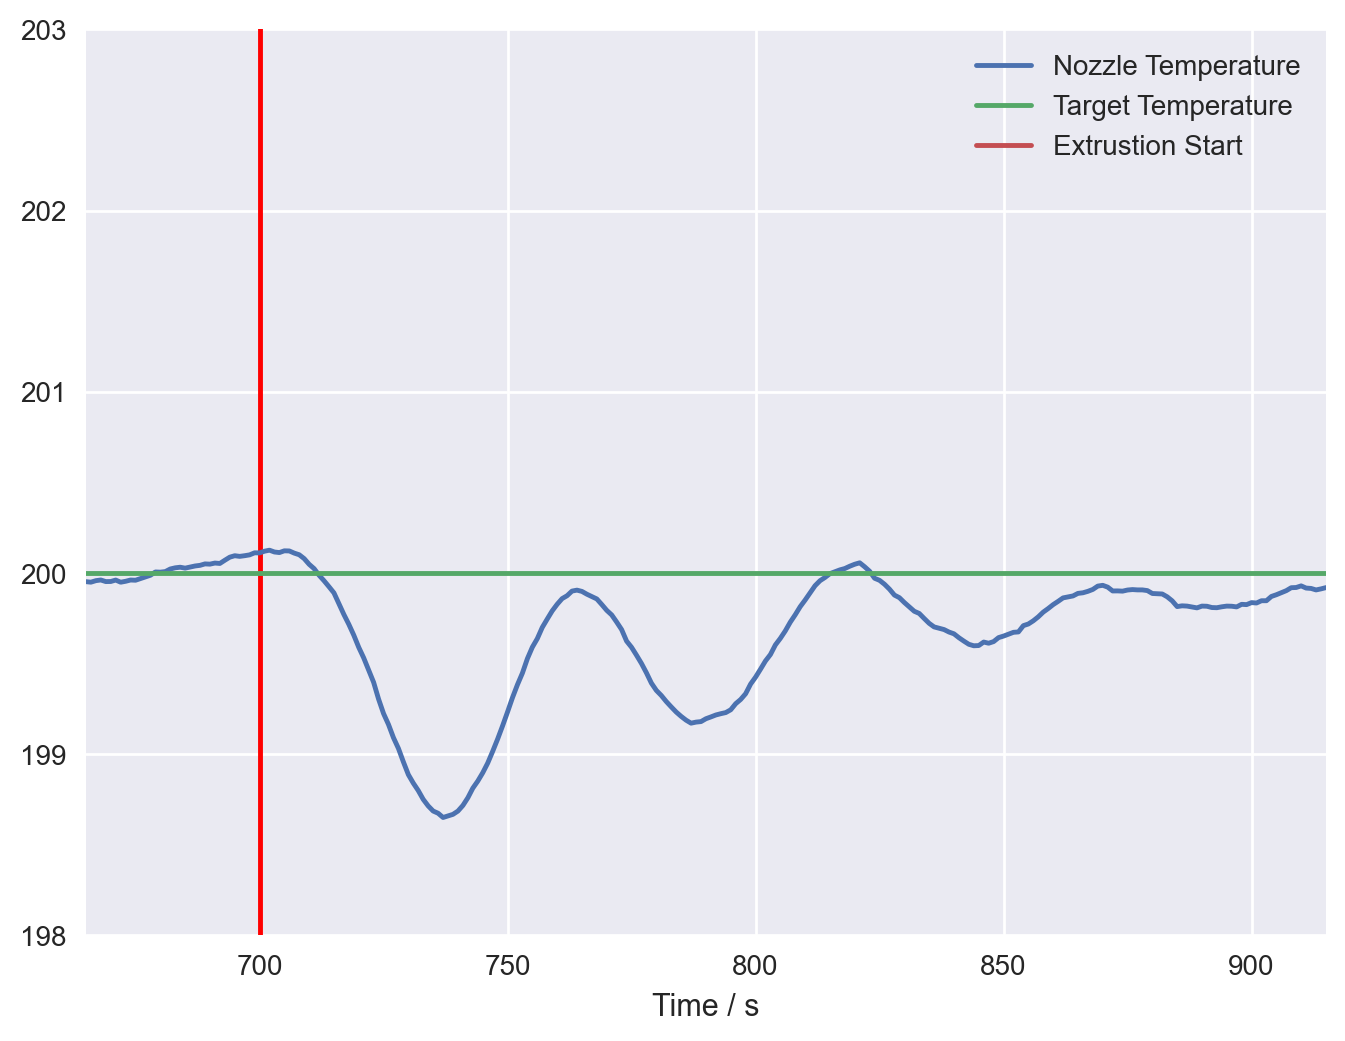

198.6509569865451


In [3]:
temp = np.load("PID_tests/EXTRUDE_test_1644247807.3613567_temp.npy")
tempD = savgol_filter(temp, 51, 3)
times = np.load("PID_tests/EXTRUDE_test_1644247807.3613567_times.npy")

plt.figure(figsize=(8,6), dpi=200)
plt.vlines(700, 0, 300, color="r")
plot(times, tempD, np.zeros_like(temp) + 200, np.zeros_like(temp), 715, "response")
print(min(tempD[650:900]))

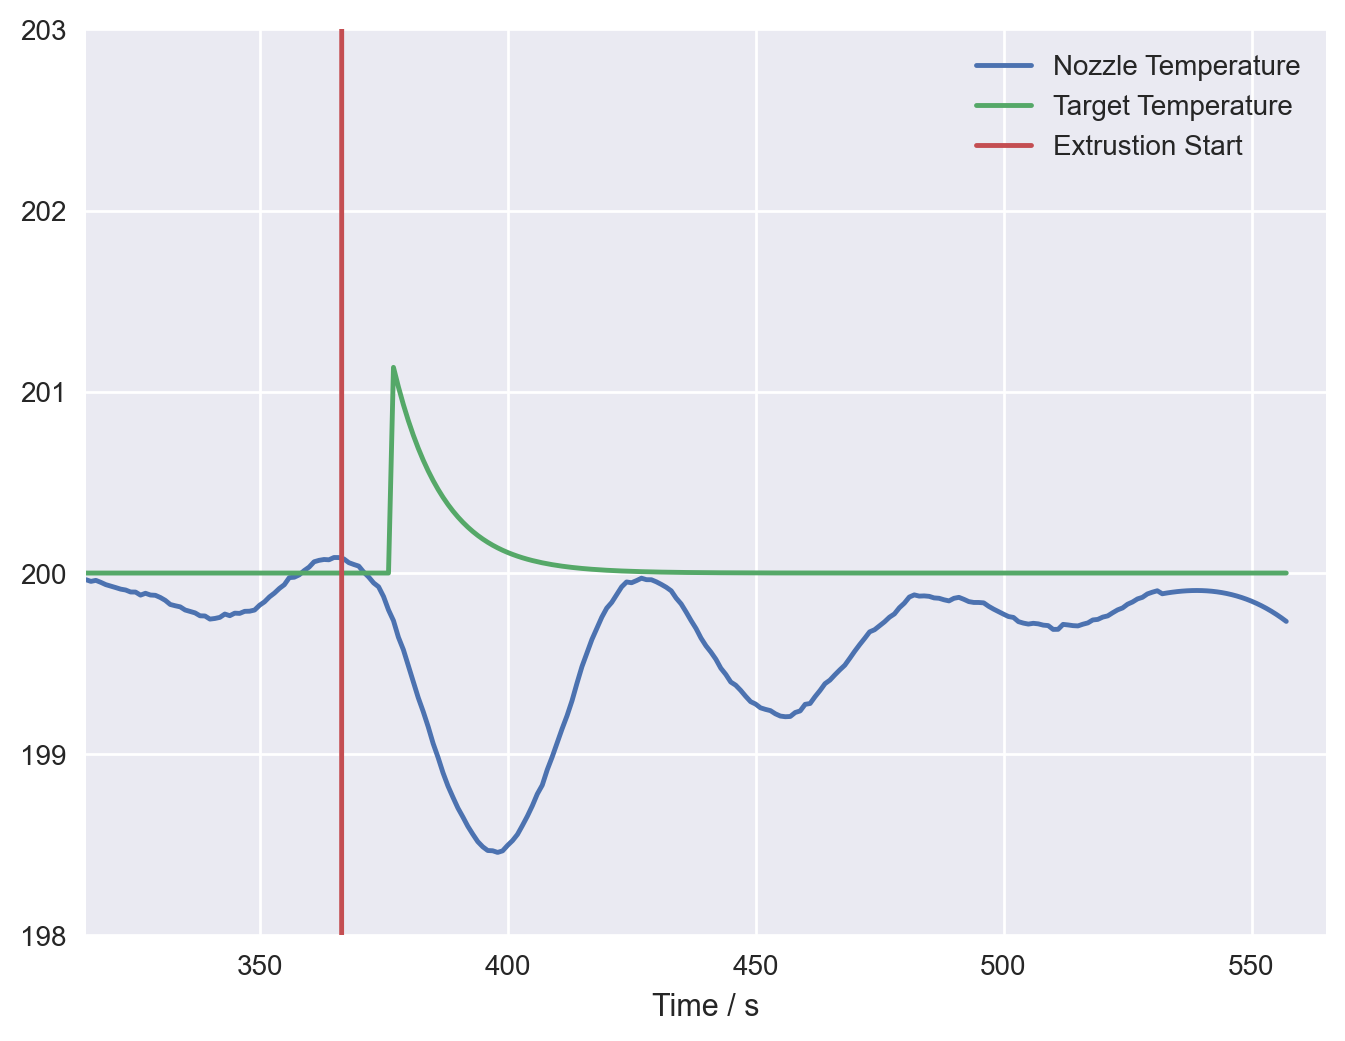

198.45821649412173


In [4]:
temp_target = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_temp_target.npy")
extrude = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_extrude.npy")
temp = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_temp.npy")
tempFF1 = savgol_filter(temp, 51, 3)
times = np.load("PID_tests/EXTRUDE_FF_1644325716.4835196_times.npy")

plt.figure(figsize=(8,6), dpi=200)
plot(times, tempFF1, temp_target, extrude, 365, "ff1")
print(min(tempFF1[250:550]))

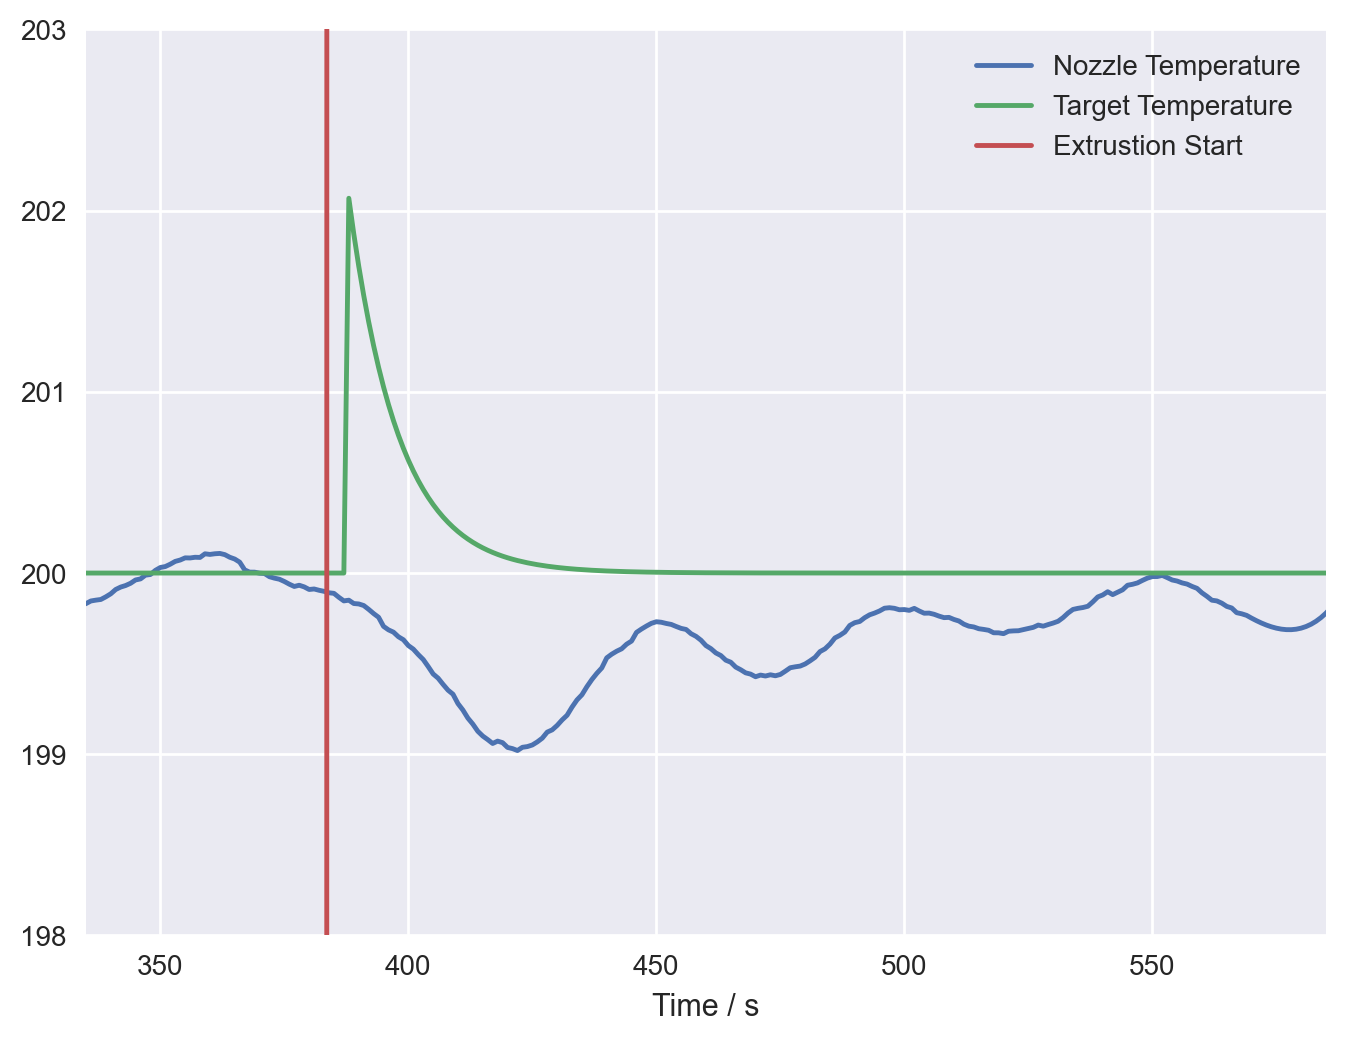

199.0204919703499


In [5]:
temp_target = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_temp_target.npy")
extrude = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_extrude.npy")
temp = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_temp.npy")
tempFF2 = savgol_filter(temp, 51, 3)
times = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_times.npy")

plt.figure(figsize=(8,6), dpi=200)
plot(times, tempFF2, temp_target, extrude, 385, "ff2")
print(min(tempFF2[250:550]))

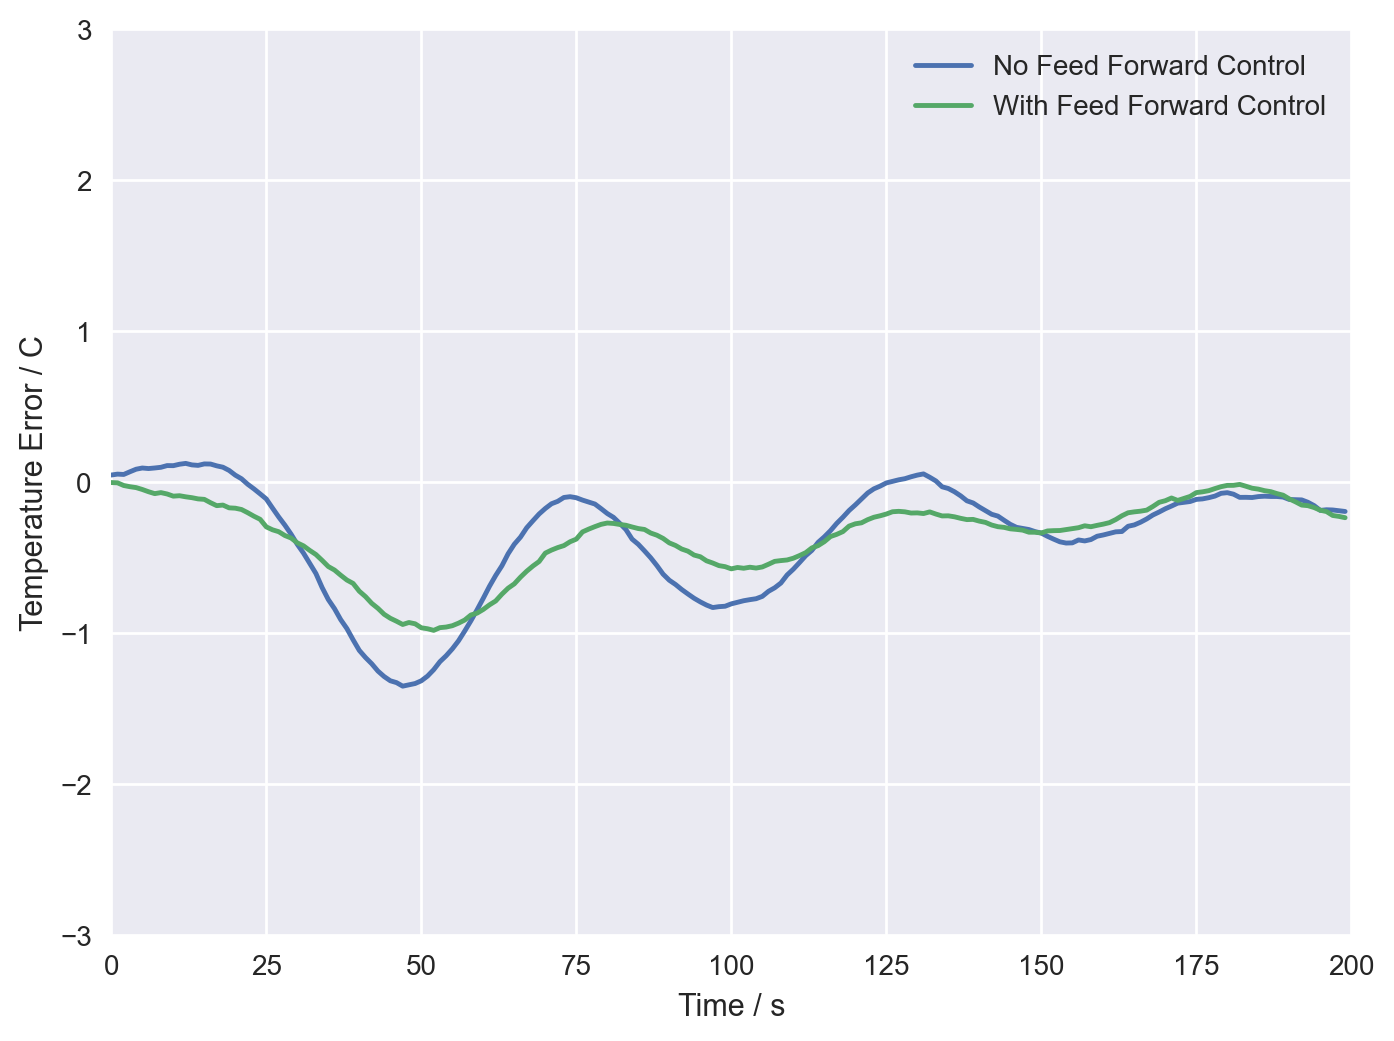

In [6]:
T = tempD[690:890] - 200 
TFF = tempFF2[370:570] - 200

plt.figure(figsize=(8,6), dpi=200)
plt.plot(T, label="No Feed Forward Control")
plt.plot(TFF, label="With Feed Forward Control")
plt.ylim(-3, 3)
plt.xlim(0, 200)
plt.ylabel("Temperature Error / C")
plt.xlabel("Time / s")
plt.legend()
plt.savefig("figures/comparison.png", dpi=200)
plt.show()


In [7]:
print(np.mean(np.square(T)))
print(np.mean(np.square(TFF)))

0.2775735222923707
0.19027600013820412


In [8]:
# Create an animation of the plots

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.style.use("seaborn")

%matplotlib inline
%matplotlib widget
import matplotlib.animation as animation


In [19]:
no_ff_temp = T
ff_temp = TFF
frames = len(ff_temp)
time = np.arange(frames) / 2.0
assert len(ff_temp) == len(time)

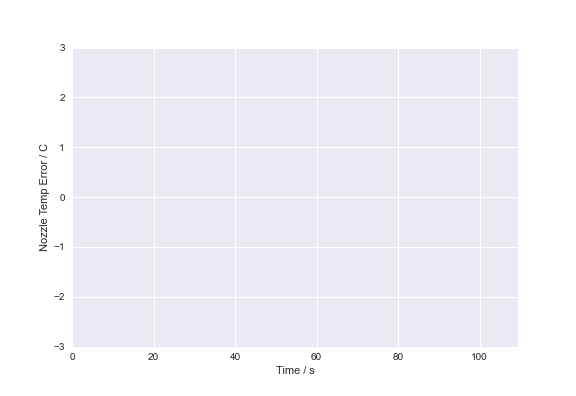

In [21]:
fig, ax = plt.subplots()

ax.set_ylabel("Nozzle Temp Error / C")
ax.set_xlabel('Time / s')

ax.set_ylim(-3, 3)
ax.set_xlim(0, time[-1] + 10)

ff_line,= ax.plot([],[])
no_ff_line, = ax.plot([],[])

def init():
  ff_line.set_data([], [])
  no_ff_line.set_data([],[])
  return ff_line, no_ff_line,

timestep = 0.5

def update(i):
  # If serial data not being read in time:
  # Read from serial here

  ff_line.set_data(time[:i], ff_temp[:i])
  no_ff_line.set_data(time[:i], no_ff_temp[:i])
  ax.autoscale()
  # ax.relim()
  # ax.autoscale_view()
  return ff_line, no_ff_line, 

ani = animation.FuncAnimation(fig, update, init_func=init, interval=timestep*100, frames=frames, blit=True, repeat=False)
plt.show()

In [7]:

ff_loaded_temp = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_temp.npy")
no_ff_loaded_temp = np.load("PID_tests/EXTRUDE_test_1644247807.3613567_temp.npy")
ff_times = np.load("PID_tests/EXTRUDE_FF_2_1644326302.3080046_times.npy")
no_ff_times = np.load("PID_tests/EXTRUDE_test_1644247807.3613567_times.npy")

print(len(ff_times))
print(len(no_ff_times))
print(len(ff_loaded_temp))
print(len(no_ff_loaded_temp))

595
1201
595
1201


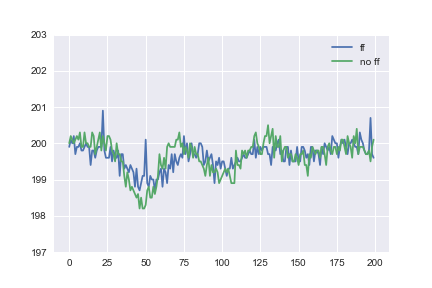

In [16]:
fig, ax = plt.subplots()

ax.plot(ff_loaded_temp[370:570], label="ff")
ax.plot(no_ff_loaded_temp[690:890], label="no ff")
ax.legend()

ax.set_ylim(197, 203)

plt.show()

In [ ]:
times = times[:550]
no_ff_loaded_temp = times[]

In [5]:
frames = 500
times = times[-frames:]
ff_loaded_temp = ff_loaded_temp[-frames:]
no_ff_loaded_temp = no_ff_loaded_temp[-frames:]

500
500
500


In [4]:
ff_loaded_temp = savgol_filter(ff_loaded_temp, 51, 3)
no_ff_loaded_temp = savgol_filter(no_ff_loaded_temp, 51, 3)
len(ff_loaded_temp)

500

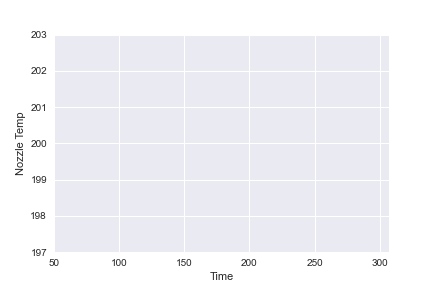

In [5]:
fig, ax = plt.subplots()

ax.set_ylabel("Nozzle Temp")
ax.set_xlabel('Time')
ax.set_ylim(197, 203)
ax.set_xlim(150, times[-1] + 10)
ff_line,= ax.plot([],[])
no_ff_line, = ax.plot([],[])

def init():
  ff_line.set_data([], [])
  no_ff_line.set_data([],[])
  return ff_line, no_ff_line,

time_data = np.array([])
ff_nozzle_temp_data = np.array([])
no_ff_nozzle_temp_data = np.array([])

timestep = 0.5

def update(i):
  # If serial data not being read in time:
  # Read from serial here

  ff_line.set_data(times[:i], ff_loaded_temp[:i])
  no_ff_line.set_data(times[:i], no_ff_loaded_temp[:i])
  ax.autoscale()
  # ax.relim()
  # ax.autoscale_view()
  return ff_line, no_ff_line, 

ani = animation.FuncAnimation(fig, update, init_func=init, interval=timestep*100, frames=frames, blit=True, repeat=False)
plt.show()

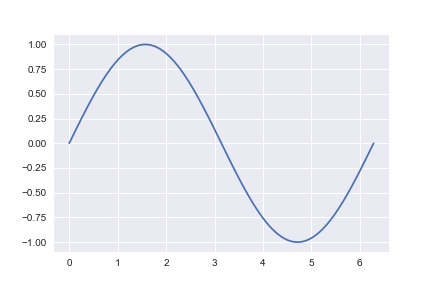

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

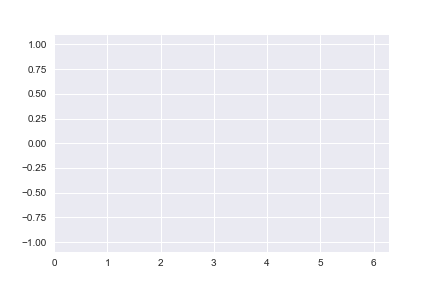

In [ ]:
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    # return line

anim = animation.FuncAnimation(fig, animate, frames=100, interval=50, repeat=False)
plt.show()